In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data visualization / analysis

Text(0, 0.5, 'gas out-in flow (kWh)')

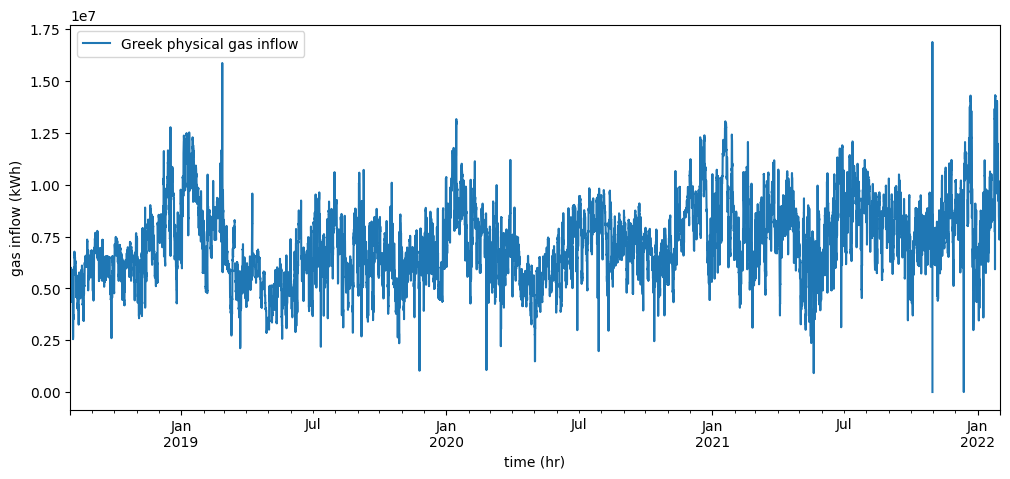

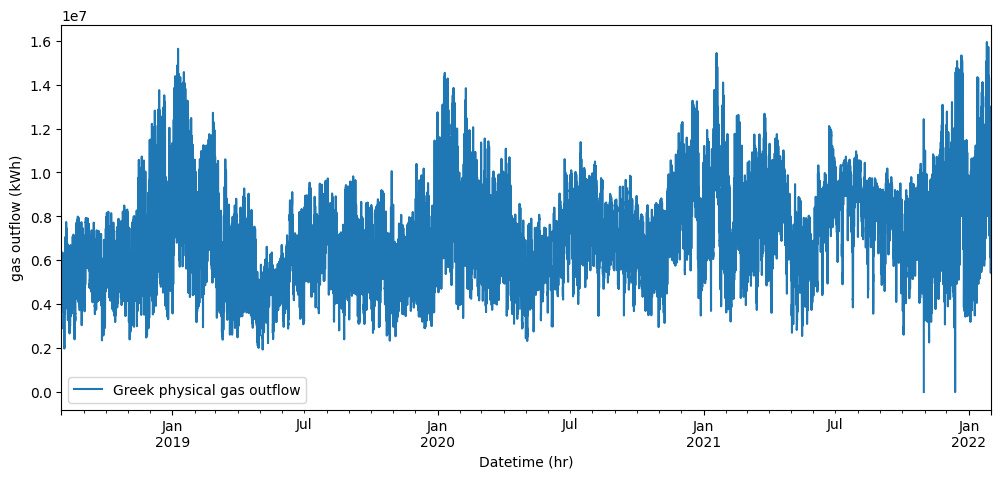

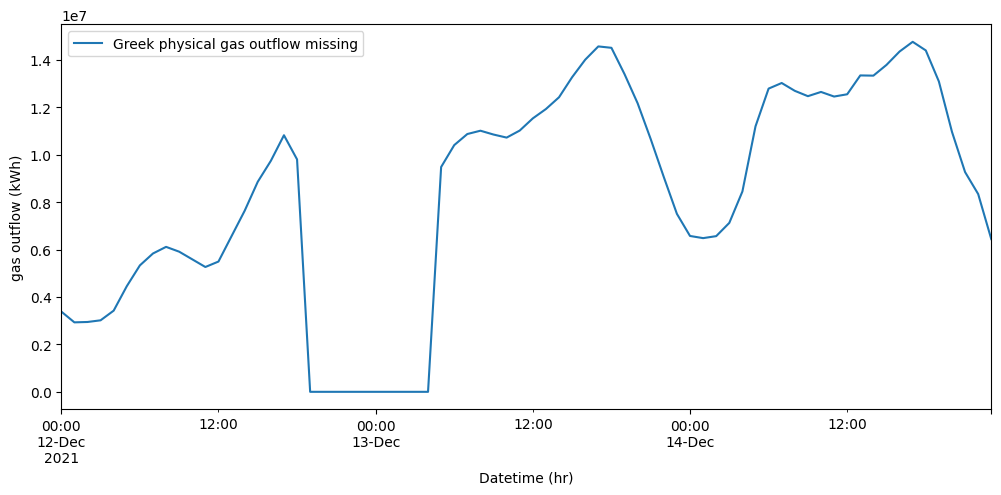

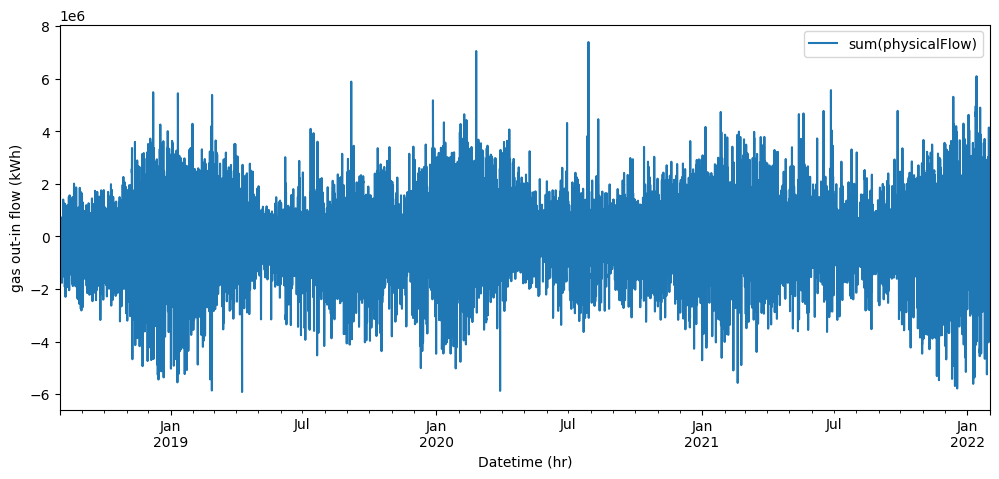

In [18]:
df_gasIn=pd.read_csv('stratos_data/desfa_stratos_hourly_gas_flow_enum0.csv',delimiter=',',parse_dates=['refRealDateTimeFrom_inZone'],index_col=['refRealDateTimeFrom_inZone'])
df_gasOut=pd.read_csv('stratos_data/desfa_stratos_hourly_gas_flow_enum1.csv',delimiter=',',parse_dates=['refRealDateTimeFrom_inZone'],index_col=['refRealDateTimeFrom_inZone'])
df_gasOut_minus_In=df_gasOut-df_gasIn
plot0=df_gasIn.asfreq('h').plot(figsize=(12,5))
plot0.set_xlabel('time (hr)')
plot0.set_ylabel('gas inflow (kWh)')
plot0.legend(['Greek physical gas inflow'])

plot1=df_gasOut.asfreq('h').plot(figsize=(12,5))
plot1.set_xlabel('Datetime (hr)')
plot1.set_ylabel('gas outflow (kWh)')
plot1.legend(['Greek physical gas outflow'])


plot1=df_gasOut['2021-12-12':'2021-12-14'].plot(figsize=(12,5))
plot1.set_xlabel('Datetime (hr)')
plot1.set_ylabel('gas outflow (kWh)')
plot1.legend(['Greek physical gas outflow missing'])


df_gasOut_minus_In=df_gasOut_minus_In.asfreq('h')
plot2=df_gasOut_minus_In.plot(figsize=(12,5))
plot2.set_xlabel('Datetime (hr)')
plot2.set_ylabel('gas out-in flow (kWh)')

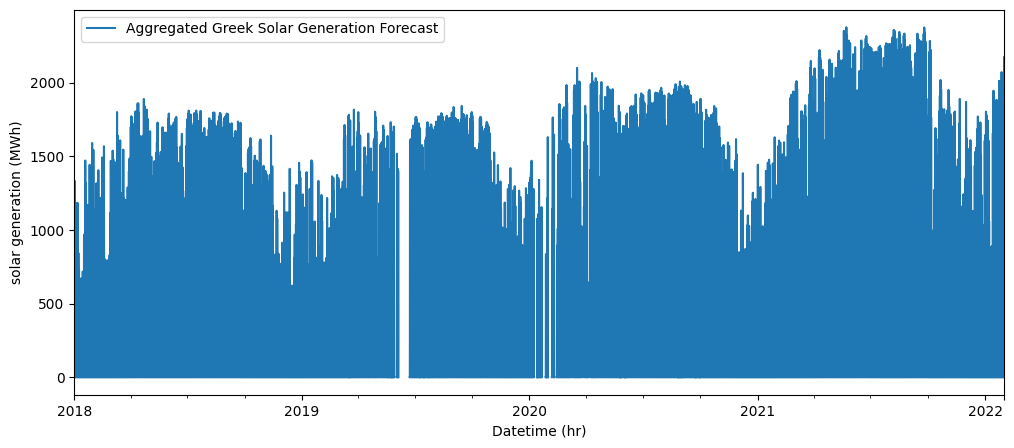

In [4]:
df_solar=pd.read_csv('stratos_data/entsoe_stratos_solar.csv',delimiter=',',parse_dates=['DateTime'],index_col=['DateTime'])
df_solar.astype('float')
plot3=df_solar.asfreq('h').plot(figsize=(12,5))
plot3.set_xlabel('Datetime (hr)')
plot3.set_ylabel('solar generation (MWh)')
plot3.legend(['Aggregated Greek Solar Generation Forecast'])

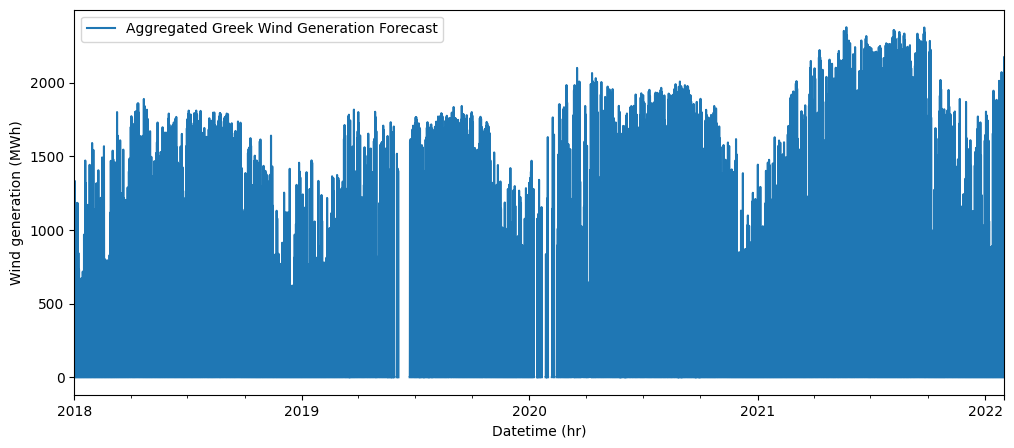

In [5]:
df_wind=pd.read_csv('stratos_data/entsoe_stratos_wind_forecast.csv',delimiter=',',parse_dates=['DateTime'],index_col=['DateTime'])

plot4=df_solar.asfreq('h').plot(figsize=(12,5))
plot4.set_xlabel('Datetime (hr)')
plot4.set_ylabel('Wind generation (MWh)')
plot4.legend(['Aggregated Greek Wind Generation Forecast'])

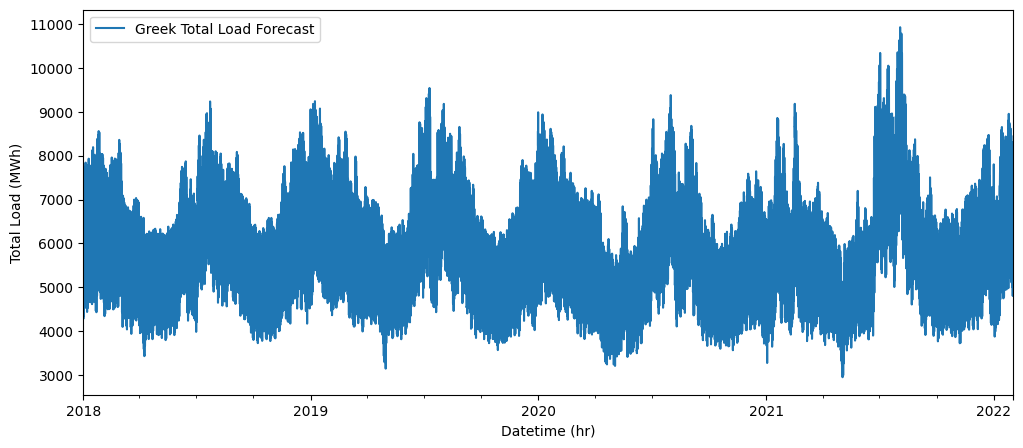

In [6]:
df_load=pd.read_csv('stratos_data/entsoe_stratos_total_load_forecast.csv',delimiter=',',parse_dates=['DateTime'],index_col=['DateTime'])

plot4=df_load.asfreq('h').plot(figsize=(12,5))
plot4.set_xlabel('Datetime (hr)')
plot4.set_ylabel('Total Load (MWh)')
plot4.legend(['Greek Total Load Forecast'])

## Αυτοσυσχέτιση

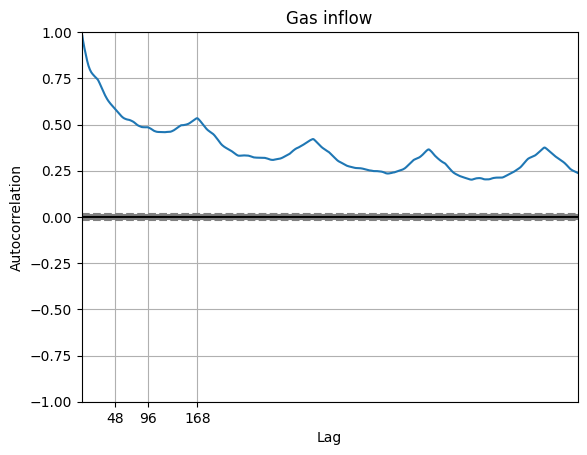

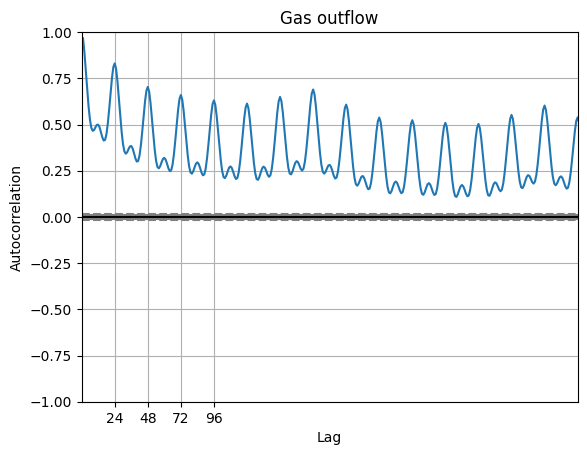

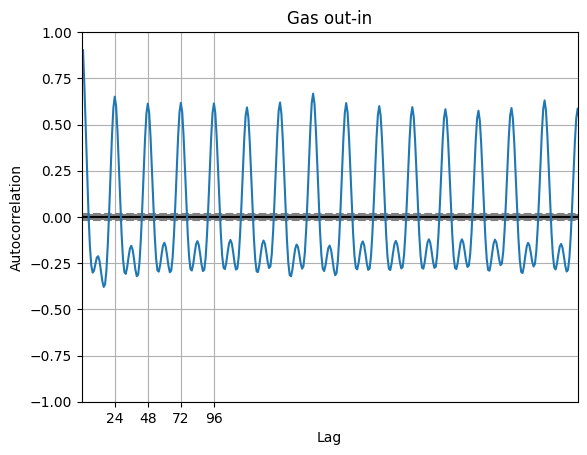

In [7]:
x=pd.plotting.autocorrelation_plot(df_gasIn['sum(physicalFlow)']).set_xlim([0, 24*30])
plt.title('Gas inflow')
plt.xticks(ticks=[48,96,24*7])
plt.show()
x=pd.plotting.autocorrelation_plot(df_gasOut['sum(physicalFlow)']).set_xlim([0, 24*15])
plt.title('Gas outflow')
plt.xticks(ticks=[24,48,72,96])
plt.show()
x=pd.plotting.autocorrelation_plot(df_gasOut['sum(physicalFlow)']-df_gasIn['sum(physicalFlow)']).set_xlim([0, 24*15])
plt.title('Gas out-in')
plt.xticks(ticks=[24,48,72,96])
plt.show()

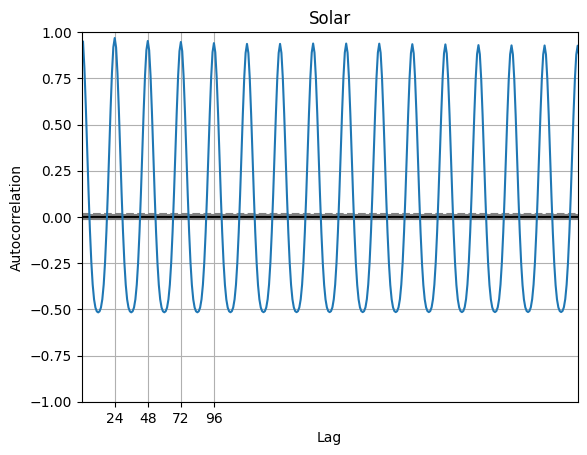

In [8]:
x=pd.plotting.autocorrelation_plot(df_solar['AggregatedGenerationForecast']).set_xlim([0, 24*15])
plt.title('Solar')
plt.xticks(ticks=[24,48,72,96])
plt.show()

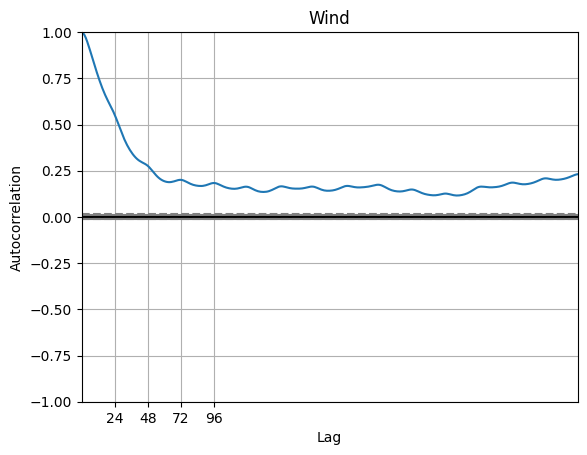

In [9]:
x=pd.plotting.autocorrelation_plot(df_wind  ['AggregatedGenerationForecast']).set_xlim([0, 24*15])
plt.title('Wind')
plt.xticks(ticks=[24,48,72,96])
plt.show()

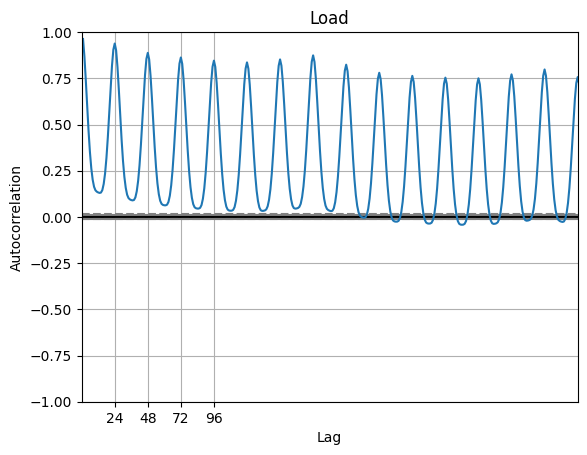

In [10]:
x=pd.plotting.autocorrelation_plot(df_load['TotalLoadForecast']).set_xlim([0, 24*15])
plt.title('Load')
plt.xticks(ticks=[24,48,72,96])
plt.show()